## Custom Estimator in ScikitLearn

In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.utils import check_X_y

In [6]:
class MostFrequentClassClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.most_frequent_ = None
      
    # fit method is must for an estimator class  
    def fit(self, X, y):
        # Validate input X and target vector y
        X, y = check_X_y(X, y)
        
        # Ensuring that y is a 1D array
        y = np.ravel(y)
        
        # Manually computing the most frequent class
        unique_classes, counts = np.unique(y, return_counts=True)
        print(unique_classes)
        print(counts)
        self.most_frequent_ = unique_classes[np.argmax(counts)]
        
        return self
    
    def predict(self, X):
        if self.most_frequent_ is None:
            raise ValueError("Model has not been trained yet.")
        
        return np.full(shape=(X.shape[0],), fill_value=self.most_frequent_)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X, y = iris_dataset.data, iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

classifier = MostFrequentClassClassifier()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(f"Predicted class for all test instances: {predictions[0]}")

[0 1 2]
[33 35 37]
Predicted class for all test instances: 2


In [5]:
# this just return the class which is most frequent in the training data
classifier.most_frequent_

2

Now this out **Custom Class** is Compatible to any other SkLearn Feature

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(classifier, X, y)

[0 1 2]
[40 40 40]
[0 1 2]
[40 40 40]
[0 1 2]
[40 40 40]
[0 1 2]
[40 40 40]
[0 1 2]
[40 40 40]


array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

## Mixins
Auxiliary classes that provide additional methods and functionality to custom estimators.

They are designed to be used through multiple inheritance and allow custom estimators to gain standardized capabilities such as **scoring**, **fitting**, **predicting**, or **transforming** without needing to re-implement these methods from scratch.

In [13]:
np.full(5, fill_value=1)

array([1, 1, 1, 1, 1])

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

class MostFrequentClassClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.most_frequent_ = None
        
    def fit(self, X, y):
        y = np.ravel(y)
        
        X, y = check_X_y(X, y)
        
        unique_classes, counts = np.unique(y, return_counts=True)
        self.most_frequent_ = unique_classes[np.argmax(counts)]
        return self
    
    def predict(self, X):
        if self.most_frequent_ is None:
            raise ValueError("Model has not been trained yet.")
        
        return np.full(shape=(X.shape[0], ), fill_value=self.most_frequent_)
    
    def score(self, X, y):
        y = np.ravel(y)
        
        prediction = self.predict(X)
        
        return accuracy_score(y, prediction)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X, y = iris_dataset.data, iris_dataset.target

is_class_0_or_1 = y < 2
X_bin = X[is_class_0_or_1]
y_bin = y[is_class_0_or_1]

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.3, random_state=2)

classifier = MostFrequentClassClassifier()
classifier.fit(X_train, y_train)

score = classifier.score(X_train, y_train)
print(f"Training accuracy: {score}")

Training accuracy: 0.5428571428571428


## Transformers

They are specific type of Estimator that is used for transforming datasets. They are designed to pre-process data such as **Scaling**, **Encoding**, **Feature Extraction** etc.

In [15]:
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

X.shape, y.shape

((100, 2), (100,))

In [17]:
X_transformed = StandardScaler().fit_transform(X)

print(f"Before Transformation: {X[0]}")
print(f"After Transformation: {X_transformed[0]}")

Before Transformation: [1.49068718 0.19669754]
After Transformation: [1.31353237 0.1430731 ]


In [18]:
LinearRegression().fit(X_transformed, y)

LinearRegression()

## Custom Transformer

In [25]:
import numpy as np

def square(x):
    return np.power(x, 2)

## test the function
def test(x):
    sq_x = square(x)
    assert sq_x == x*x, f"Expected {x*x}, but got {sq_x}"

In [26]:
test(2)

In [27]:
from sklearn.preprocessing import FunctionTransformer

square_transformer = FunctionTransformer(func=square)

In [51]:
# using the transformer directly

X = np.array([1, 2, 3, 4]).reshape(-1) # -1 means infer the value what it can be based on the other dimensions and number of elements in array
X

array([1, 2, 3, 4])

In [52]:
X_squared = square_transformer.transform(X)
X_squared

array([ 1,  4,  9, 16], dtype=int32)

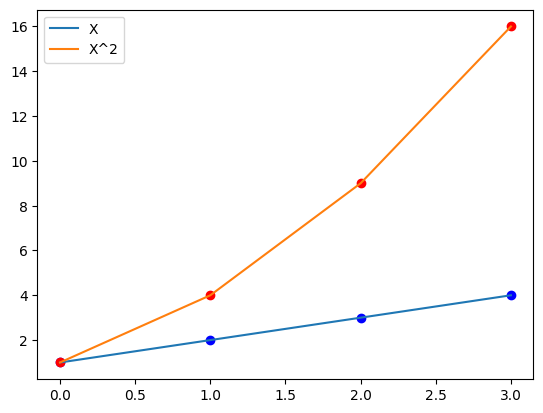

In [62]:
import matplotlib.pyplot as plt

plt.plot(X, label="X")
plt.plot(X_squared, label="X^2")
# also dot on the point
plt.scatter(range(len(X)), X, color='blue')
plt.scatter(range(len(X)), X_squared, color='red')
plt.legend()

## Using BaseEstimator and Transformer Mixin for custom Transformer

Used when we need to learn from data first. Use **Function** transformer when there is no need to learn from the data.

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

In [39]:
class MedianIQRScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.medians_ = None
        self.iqrs_ = None
        
    def fit(self, X, y=None):
        self.medians_ = np.median(X, axis=0)
        Q1 = np.percentile(X, 25, axis=0)
        Q2 = np.percentile(X, 75, axis=0)
        self.iqrs_ = Q2 - Q1
        
        self.iqrs_[self.iqrs_ == 0] = 1
        
    def transform(self, X):
        if self.medians_ is None or self.iqrs_ is None:
            raise RuntimeError("The transformer has not been fitted yet.")
        
        scaled = (X - self.medians_) / self.iqrs_
        return scaled

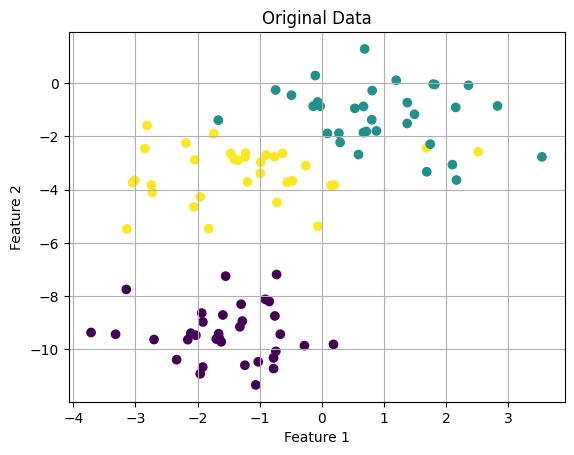

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 

X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")
plt.grid(True)

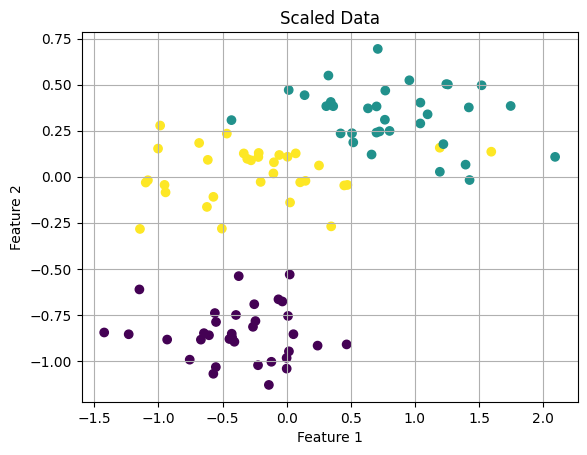

In [48]:
scaler = MedianIQRScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scaled Data")
plt.grid(True)

## Composite Transformers
Composite Transformers are those that is built from multiple other transformers or estimators, combining their functionality.

- Column Transformer

In [49]:
import pandas as pd

In [63]:
data = {
    "Social Media Platform": ["Twitter", "Facebook", "Instagram", "Twitter", "Facebook",
                              "Instagram", "Twitter", "Facebook", "Instagram", "Twitter"],
    "Review": ["Love the new update!", "Too many ads now", "Great for sharing photos",
               "Newsfeed algorithm is biased", "Privacy concerns with latest update",
               "Amazing filters!", "Too much spam", "Easy to connect with friends",
               "Stories feature is fantastic", "Customer support lacking"],
    "age": [21, 19, np.nan, 17, 24, np.nan, 30, 19, 16, 31],
    "Sentiment": [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Numeric labels: 1 for Positive, 0 for Negative
}

In [64]:
dataset = pd.DataFrame(data)
dataset

,Social Media Platform,Review,age,Sentiment
0,Twitter,Love the new update!,21.0,1
1,Facebook,Too many ads now,19.0,0
2,Instagram,Great for sharing photos,NaN,1
3,Twitter,Newsfeed algorithm is biased,17.0,0
4,Facebook,Privacy concerns with latest update,24.0,0
5,Instagram,Amazing filters!,NaN,1
6,Twitter,Too much spam,30.0,0
7,Facebook,Easy to connect with friends,19.0,1
8,Instagram,Stories feature is fantastic,16.0,1
9,Twitter,Customer support lacking,31.0,0


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [73]:
column_transformer = ColumnTransformer(
    transformers=[
        ("platform_ohe", OneHotEncoder(), ["Social Media Platform"]),
        ("review_bow", CountVectorizer(), "Review"),
        ("age_impute", SimpleImputer(strategy="mean"), ["age"])
    ],
    remainder="drop" # drop other columns not specified in transformers
    # remainder="passthrough" # keep other columns not specified in transformers as we dont want to transform it
)

In [74]:
pd.DataFrame(
    column_transformer.fit_transform(dataset).toarray(), # data
    columns=column_transformer.get_feature_names_out() # column name
)

,platform_ohe__Social Media Platform_Facebook,platform_ohe__Social Media Platform_Instagram,platform_ohe__Social Media Platform_Twitter,review_bow__ads,review_bow__algorithm,review_bow__amazing,review_bow__biased,review_bow__concerns,review_bow__connect,review_bow__customer,...,review_bow__sharing,review_bow__spam,review_bow__stories,review_bow__support,review_bow__the,review_bow__to,review_bow__too,review_bow__update,review_bow__with,age_impute__age
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.125
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,24.000
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.125
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.000
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19.000
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31.000


## Feature Union
Apply multiple **transformation** **parallely** on **Entire Dataset**.

Used when we want to use multiple transformation on same feature.

Example: if we have 3 features, then we apply **StandardScaler()** and **PCA with 2 features()** Then total we have **5 Features** in total after transformation.

In [75]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA

In [76]:
feature_union = FeatureUnion([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2))
])

In [80]:
import pandas as pd
import numpy as np

data = np.random.randn(10, 4) # random normal distribution dataset
df = pd.DataFrame(data, columns=["f1", "f2", "f3", "y"])
df

,f1,f2,f3,y
0,0.286400,1.087539,-0.172197,-0.156744
1,0.747242,-1.215081,0.706853,0.275850
2,0.979630,0.176596,1.135807,-0.014162
3,-1.475693,-1.230399,0.828300,-0.968132
4,1.544084,0.826718,-0.333983,0.075973
5,-0.416580,-1.150182,-0.760725,-2.013470
6,-0.129378,-1.573567,-1.912704,0.402880
7,-0.656104,-0.430523,-0.000545,-0.996035
8,0.292915,-0.717331,0.972937,-0.154339
9,-0.831455,-1.215299,0.996342,-1.982159


In [81]:
X_transformed = feature_union.fit_transform(df.drop(columns=["y"]))
X_transformed

array([[ 0.29039261,  1.83549864, -0.34352477,  1.32243669,  0.33810932],
       [ 0.82082634, -0.75473056,  0.60547017,  0.05516782, -0.45561305],
       [ 1.08830813,  0.81077452,  1.06855596,  1.2565351 , -0.85894466],
       [-1.7377939 , -0.7719621 ,  0.73658121, -1.47207304, -0.8738989 ],
       [ 1.73799992,  1.54209938, -0.51818448,  1.98390648,  0.66882115],
       [-0.51874441, -0.68172495, -0.97888127, -0.82657035,  0.84220069],
       [-0.1881714 , -1.15799335, -2.22252207, -1.03612291,  2.02512384],
       [-0.79443924,  0.12782305, -0.15821486, -0.40501035,  0.05191775],
       [ 0.29789149, -0.1948088 ,  0.8927265 ,  0.12561006, -0.78357127],
       [-0.99626955, -0.75497583,  0.91799361, -1.0038795 , -0.95414487]])

In [82]:
pd.DataFrame(X_transformed, columns=feature_union.get_feature_names_out())

,scaler__f1,scaler__f2,scaler__f3,pca__pca0,pca__pca1
0,0.290393,1.835499,-0.343525,1.322437,0.338109
1,0.820826,-0.754731,0.605470,0.055168,-0.455613
2,1.088308,0.810775,1.068556,1.256535,-0.858945
3,-1.737794,-0.771962,0.736581,-1.472073,-0.873899
4,1.738000,1.542099,-0.518184,1.983906,0.668821
5,-0.518744,-0.681725,-0.978881,-0.826570,0.842201
6,-0.188171,-1.157993,-2.222522,-1.036123,2.025124
7,-0.794439,0.127823,-0.158215,-0.405010,0.051918
8,0.297891,-0.194809,0.892727,0.125610,-0.783571
9,-0.996270,-0.754976,0.917994,-1.003879,-0.954145


## PipeLine
Do apply **transformation** but **Sequentially**

Example: for 3 features first apply **Scaling** then **PCA** then we will get **2 Features out**

In [83]:
from sklearn.pipeline import Pipeline

In [85]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2))
])

In [87]:
pd.DataFrame(pipeline.fit_transform(data), columns=pipeline.get_feature_names_out())

,pca0,pca1
0,1.421393,-0.144182
1,0.652600,-0.125940
2,1.419050,-1.123394
3,-1.832389,-0.489540
4,2.362498,0.113574
5,-1.603551,0.718009
6,0.034685,2.678090
7,-0.729253,0.013566
8,0.306096,-0.661947
9,-2.031127,-0.978236


## All Example

In [96]:
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer

In [98]:
data = {
    "Social Media Platform": ["Twitter", "Facebook", "Instagram", "Twitter", "Facebook",
                              "Instagram", "Twitter", "Facebook", "Instagram", "Twitter"],
    "Review": ["Love the new update!", "Too many ads now", "Great for sharing photos",
               "Newsfeed algorithm is biased", "Privacy concerns with latest update",
               "Amazing filters!", "Too much spam", "Easy to connect with friends",
               "Stories feature is fantastic", "Customer support lacking"],
    "age": [21, 19, np.nan, 17, 24, np.nan, 30, 19, 16, 31],
    "Sentiment": [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Numeric labels: 1 for Positive, 0 for Negative
}

In [99]:
dataset = pd.DataFrame(data)
dataset

,Social Media Platform,Review,age,Sentiment
0,Twitter,Love the new update!,21.0,1
1,Facebook,Too many ads now,19.0,0
2,Instagram,Great for sharing photos,NaN,1
3,Twitter,Newsfeed algorithm is biased,17.0,0
4,Facebook,Privacy concerns with latest update,24.0,0
5,Instagram,Amazing filters!,NaN,1
6,Twitter,Too much spam,30.0,0
7,Facebook,Easy to connect with friends,19.0,1
8,Instagram,Stories feature is fantastic,16.0,1
9,Twitter,Customer support lacking,31.0,0


In [100]:
def count_words(reviews):
    return np.array([len(review.split()) for review in reviews]).reshape(-1, 1)

In [101]:
from sklearn.preprocessing import FunctionTransformer

word_count_transformer = FunctionTransformer(func=count_words)

In [95]:
feature_union = FeatureUnion([
    ("word_count", word_count_transformer),
    ("bows", CountVectorizer())
])

In [103]:
column_transformer = ColumnTransformer(
    transformers=[
        ("age_imputer", SimpleImputer(strategy="mean"), ["age"]),
        ("platform_ohe", OneHotEncoder(), ['Social Media Platform']),
        ("review_processing", feature_union, "Review")
    ],
    remainder="drop"
)

In [104]:
final_pipeline = Pipeline(
    steps=[
        ("col_transformer", column_transformer),
        ("scaler", MaxAbsScaler()),
        ("selector", SelectKBest(score_func=chi2, k=10)),
        ("classifier", LogisticRegression())
    ]
)

In [105]:
final_pipeline.fit(
    X=dataset.drop(columns=["Sentiment"]),
    y = dataset["Sentiment"]
)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('age_imputer',
                                                  SimpleImputer(), ['age']),
                                                 ('platform_ohe',
                                                  OneHotEncoder(),
                                                  ['Social Media Platform']),
                                                 ('review_processing',
                                                  FeatureUnion(transformer_list=[('word_count',
                                                                                  FunctionTransformer(func=<function count_words at 0x000001A4F895CB80>)),
                                                                                 ('bows',
                                                                                  CountVectorizer())]),
                                                  'Review')])),
                ('scaler', MaxAbsScaler()),
                ('selector',
                 SelectKBest(score_func=<function chi2 at 0x000001A4F88C6B60>)),
                ('classifier', LogisticRegression())])